# Linear Regression

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df=pd.read_csv('Datasets/homeprices.csv')

In [3]:
df.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


In [4]:
# df.plot(x='area',y='price', style='o')


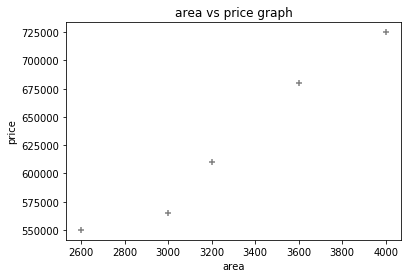

In [5]:
# visualizing data
plt.title('area vs price graph')
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df['area'],df['price'],color='gray',marker='+')
plt.show()

# linear regression :
* y=mx+b
* y=dependent varible
* x=independent varible

* Where b is the intercept and m is the slope of the line. So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). The y and x variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept(b) and slope(m). There can be multiple straight lines depending upon the values of intercept and slope. Basically what the linear regression algorithm does is it fits multiple lines on the data points and returns the line that results in the least error.
    

In [7]:
x=df['area'].values.reshape(-1,1)
y=df['price'].values.reshape(-1,1)

reg_model=LinearRegression()
reg_model.fit(x,y)#training the linear regression algorithm to fnd best fit line(best value of slope and intercept)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
m=reg_model.coef_
# print the value of slope
c=reg_model.intercept_
# print the value of intercept

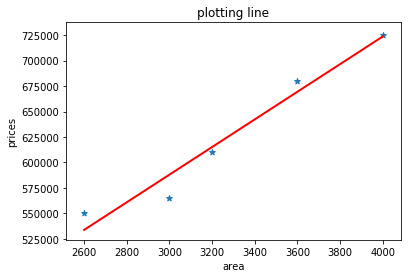

In [9]:
# visualizing the linear regression line
y_pred=m*x+c
plt.title('plotting line')
plt.xlabel('area')
plt.ylabel('prices')
plt.plot(x,y_pred,'r',linewidth=2)
plt.scatter(x,y,marker='*')




In [10]:
reg_model.predict([[3300]])

array([[628715.75342466]])

# Linear Regression on weather dataset

In [11]:
df=pd.read_csv('datasets/weather.csv')
df

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df.columns[df.isnull().all()]#finding columns with all nan value
df.columns[df.isnull().any()]#checking columns having some nan value


Index(['WindGustSpd', 'Snowfall', 'PoorWeather', 'PRCP', 'DR', 'SPD', 'MAX',
       'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH', 'PGT',
       'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [13]:
# delete all the columns except MinTemp and MaxTemp
df = df.loc[:, df.columns.intersection(['MaxTemp','MinTemp'])]
df


,MaxTemp,MinTemp
0,25.555556,22.222222
1,28.888889,21.666667
2,26.111111,22.222222
3,26.666667,22.222222
4,26.666667,21.666667
...,...,...
119035,28.333333,18.333333
119036,29.444444,18.333333
119037,28.333333,18.333333
119038,28.333333,18.333333


In [14]:
df.to_csv('temperature.csv',encoding='utf-8',index=False)
# saving only the selected field to new csv file

In [15]:
df=pd.read_csv('temperature.csv')
df

,MaxTemp,MinTemp
0,25.555556,22.222222
1,28.888889,21.666667
2,26.111111,22.222222
3,26.666667,22.222222
4,26.666667,21.666667
...,...,...
119035,28.333333,18.333333
119036,29.444444,18.333333
119037,28.333333,18.333333
119038,28.333333,18.333333


In [16]:
x=df['MinTemp'].values.reshape(-1,1)
y=df['MaxTemp'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
x_train,x_test

(array([[22.22222222],
        [17.77777778],
        [-9.44444444],
        ...,
        [ 3.33333333],
        [10.        ],
        [15.55555556]]), array([[25.        ],
        [21.11111111],
        [17.22222222],
        ...,
        [23.88888889],
        [21.66666667],
        [22.77777778]]))

In [18]:
df.columns[newdf.isnull().any()]
# checking if there is any null data null

NameError: name 'newdf' is not defined

In [19]:
model=LinearRegression()
model.fit(x_train,y_train)#training algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
m=model.coef_#slope
c=model.intercept_#y-intercept

In [21]:
y_pred=model.predict(x_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


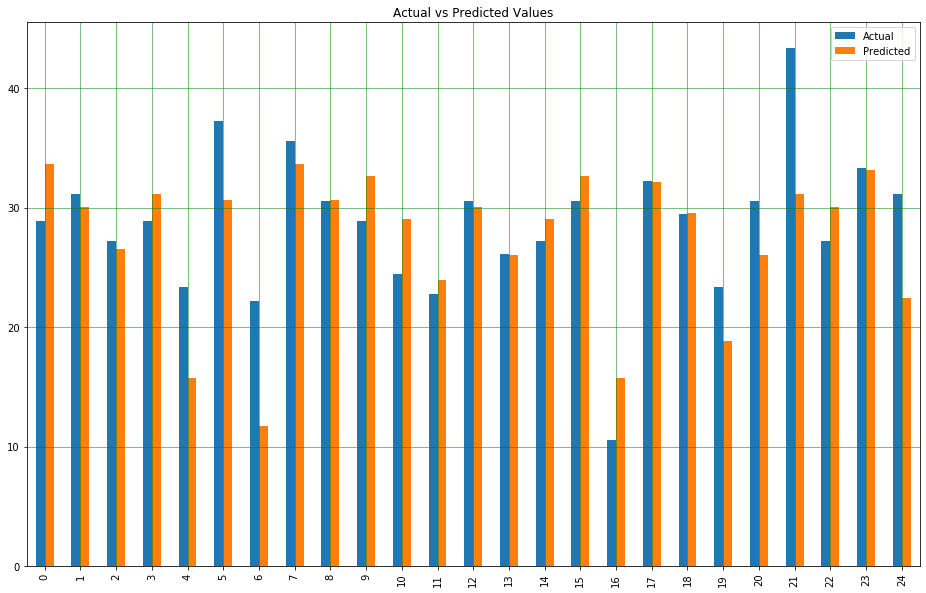

In [22]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.title('Actual vs Predicted Values')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

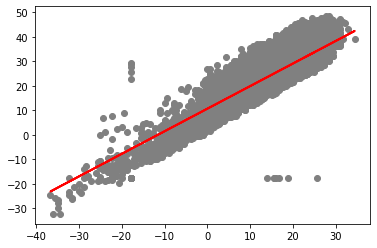

In [23]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [24]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy:',model.score(x_test,y_test)*100,'%')


Mean Absolute Error: 3.1993291783785285
Mean Squared Error: 17.631568097568444
Root Mean Squared Error: 4.198996082109204
Accuracy: 76.70218843587763 %


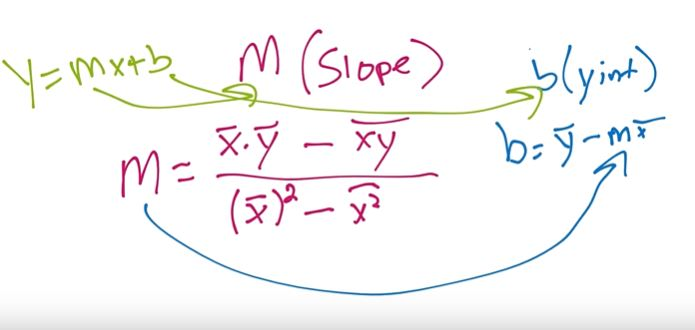

In [1]:
from IPython.display import Image
Image(filename='linear_reg.jpg') 